In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
df = pd.read_csv("c:\\Users\lyhe\downloads\ccdefault.csv", header=None)

In [3]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,30001,82,3,8,5,57,12,12,12,12,...,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,17147,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [20]:
Xp = df.iloc[:,2:24]
yp = df.iloc[:,24]

In [21]:
Xp.head()

,2,3,4,5,6,7,8,9,10,11,...,14,15,16,17,18,19,20,21,22,23
0,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1,2,2,1,24,2,2,-1,-1,-2,-2,...,689,0,0,0,0,689,0,0,0,0
2,2,2,2,26,-1,2,0,0,0,2,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,2,2,2,34,0,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,2,2,1,37,0,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000


In [22]:
yp.head()

0    DEFAULT
1          1
2          1
3          0
4          0
Name: 24, dtype: object

In [62]:
X = df.iloc[:,2:24].values
y = df.iloc[:,24].values

In [63]:
print(X.shape)
print(y.shape)

(30001, 22)
(30001,)


In [64]:
X = X[1:,:]
y = y[1:]

In [65]:
print(X.shape)
print(y.shape)

(30000, 22)
(30000,)


In [52]:
type(y)

numpy.ndarray

In [27]:
SEED = np.arange(1,11)

In [28]:
SEED

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 33)

In [76]:
k_range = range(28,50)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Accuracy Score')

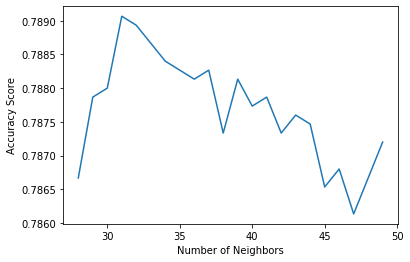

In [77]:
import matplotlib.pyplot as plt
plt.plot(k_range, scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')

In [79]:
result = np.where(scores == np.amax(scores))
 
print('Returned tuple of arrays :', result)
print('List of Indices of maximum element :', result[0])

Returned tuple of arrays : (array([3], dtype=int64),)
List of Indices of maximum element : [3]


In [80]:
print(scores)

[0.7866666666666666, 0.7878666666666667, 0.788, 0.7890666666666667, 0.7889333333333334, 0.7886666666666666, 0.7884, 0.7882666666666667, 0.7881333333333334, 0.7882666666666667, 0.7873333333333333, 0.7881333333333334, 0.7877333333333333, 0.7878666666666667, 0.7873333333333333, 0.7876, 0.7874666666666666, 0.7865333333333333, 0.7868, 0.7861333333333334, 0.7866666666666666, 0.7872]


In [81]:
k_range[3]

31

In [82]:
from sklearn.tree import DecisionTreeClassifier
k_range = range(1,10)
scores = []
for k in k_range:
    dt = DecisionTreeClassifier(max_depth = k)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Accuracy Score')

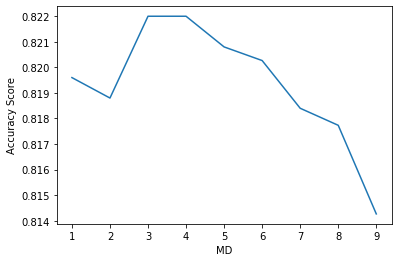

In [83]:
plt.plot(k_range, scores)
plt.xlabel('MD')
plt.ylabel('Accuracy Score')

In [84]:
result = np.where(scores == np.amax(scores))
 
print('Returned tuple of arrays :', result)
print('List of Indices of maximum element :', result[0])

Returned tuple of arrays : (array([2, 3], dtype=int64),)
List of Indices of maximum element : [2 3]


In [85]:
%%time
scores = []
for seed in SEED:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = seed)
    dt = DecisionTreeClassifier(max_depth = 3)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Wall time: 3.29 s


In [86]:
np.mean(scores)

0.8233333333333335

In [87]:
np.std(scores)

0.008129507296810121

In [88]:
print(scores)

[0.824, 0.823, 0.835, 0.8106666666666666, 0.8313333333333334, 0.8116666666666666, 0.8193333333333334, 0.8306666666666667, 0.817, 0.8306666666666667]


In [94]:
%%time
from sklearn.model_selection import cross_val_score
cv = cross_val_score(dt,X,y,cv=10)

Wall time: 2.8 s


In [95]:
print(cv)

[0.8083972  0.80773076 0.8143952  0.80606465 0.82033333 0.82866667
 0.83294431 0.83394465 0.82794265 0.82527509]


In [96]:
np.mean(cv)

0.8205694506299391

In [97]:
np.std(cv)

0.010176774481345319

In [98]:
print("My name is {Lingyu He}")
print("My NetID is: {lingyuh2}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Lingyu He}
My NetID is: {lingyuh2}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
